In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import altair as alt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from scipy.stats import ttest_rel
from scipy.stats import shapiro, levene, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
from urllib.parse import quote_plus
from sqlalchemy_utils import create_database, database_exists
from sqlalchemy import MetaData
import pymysql
from sqlalchemy.orm import Session
from sqlalchemy import Table, Column, Integer, BIGINT, String, BigInteger, Boolean, Float, Unicode
from sqlalchemy import ForeignKey, Text
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.dialects.mysql import LONGTEXT
from sqlalchemy import create_engine

In [3]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="3901",
    database="lotech",
    auth_plugin='mysql_native_password'
)

In [4]:
query = """
select
       orders.ship_duration,
       priorities.priority
from orders
        inner join priorities on orders.priority_id = priorities.id
"""
mycursor = mydb.cursor()
mycursor.execute(query)
orders = mycursor.fetchall()
df_orders = pd.DataFrame(
    orders,
    columns=['ship_duration', 'priority'])

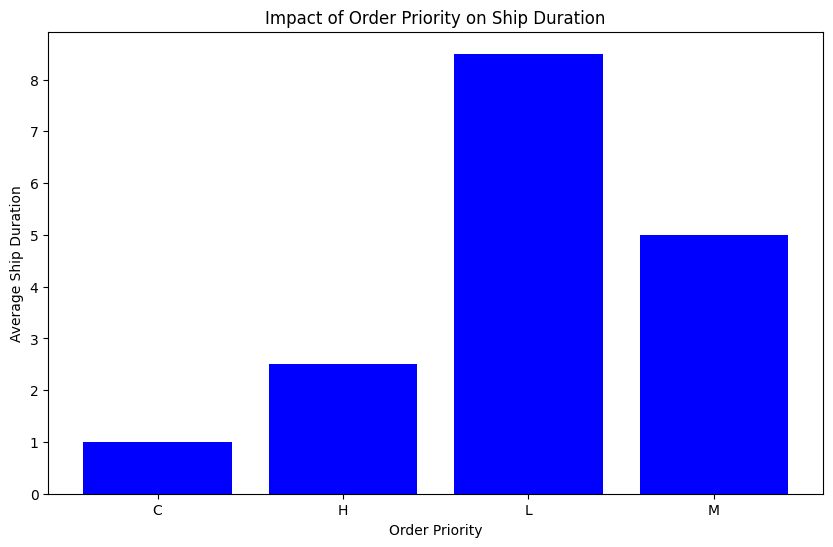

In [5]:
grouped_data = df_orders.groupby('priority')['ship_duration'].mean().reset_index()

grouped_data.to_csv('14-priority-preference.csv', index=False)

plt.figure(figsize=(10, 6))
plt.bar(grouped_data['priority'], grouped_data['ship_duration'], color='blue')
plt.xlabel('Order Priority')
plt.ylabel('Average Ship Duration')
plt.title('Impact of Order Priority on Ship Duration')
plt.show()